# Assignment 1

In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

from PIL import Image
import requests
from io import BytesIO

In [2]:
url = 'https://images-na.ssl-images-amazon.com/images/I/81KA4Aty8xL._SL1000_.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [3]:
image = np.array(img)
image

array([[[136, 122, 148],
        [136, 121, 150],
        [156, 136, 171],
        ...,
        [190, 195, 173],
        [182, 187, 164],
        [195, 201, 175]],

       [[137, 123, 149],
        [137, 122, 151],
        [150, 131, 163],
        ...,
        [192, 196, 179],
        [187, 192, 172],
        [193, 198, 176]],

       [[136, 121, 150],
        [138, 123, 152],
        [143, 124, 156],
        ...,
        [208, 210, 197],
        [209, 211, 197],
        [210, 213, 196]],

       ...,

       [[ 83,  45,  84],
        [ 86,  43,  86],
        [ 88,  41,  87],
        ...,
        [219, 219, 229],
        [220, 220, 230],
        [220, 220, 230]],

       [[ 89,  51, 100],
        [ 82,  42,  92],
        [ 76,  32,  85],
        ...,
        [219, 219, 229],
        [220, 220, 230],
        [220, 220, 230]],

       [[ 76,  37,  92],
        [ 76,  35,  91],
        [ 77,  32,  89],
        ...,
        [219, 219, 229],
        [220, 220, 230],
        [220, 220, 230]]

In [4]:
#image = io.imread('image.jpg')
#image = np.array(image)
#image

In [5]:
image.shape

(1000, 1000, 3)

In [6]:
inverted = np.ones((1000, 1000, 3)) * 255


In [7]:
inverted = np.subtract(inverted, image)
inverted

array([[[119., 133., 107.],
        [119., 134., 105.],
        [ 99., 119.,  84.],
        ...,
        [ 65.,  60.,  82.],
        [ 73.,  68.,  91.],
        [ 60.,  54.,  80.]],

       [[118., 132., 106.],
        [118., 133., 104.],
        [105., 124.,  92.],
        ...,
        [ 63.,  59.,  76.],
        [ 68.,  63.,  83.],
        [ 62.,  57.,  79.]],

       [[119., 134., 105.],
        [117., 132., 103.],
        [112., 131.,  99.],
        ...,
        [ 47.,  45.,  58.],
        [ 46.,  44.,  58.],
        [ 45.,  42.,  59.]],

       ...,

       [[172., 210., 171.],
        [169., 212., 169.],
        [167., 214., 168.],
        ...,
        [ 36.,  36.,  26.],
        [ 35.,  35.,  25.],
        [ 35.,  35.,  25.]],

       [[166., 204., 155.],
        [173., 213., 163.],
        [179., 223., 170.],
        ...,
        [ 36.,  36.,  26.],
        [ 35.,  35.,  25.],
        [ 35.,  35.,  25.]],

       [[179., 218., 163.],
        [179., 220., 164.],
        [178., 2

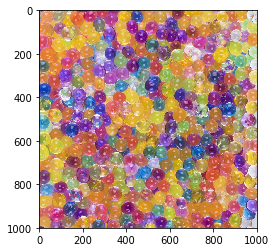

In [8]:
plt.imshow(image)

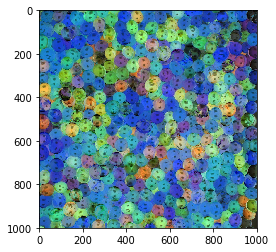

In [9]:
plt.imshow(inverted / 255)

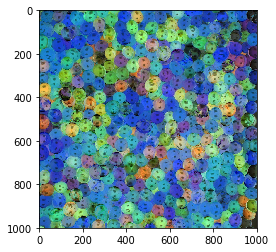

In [10]:
plt.imshow((inverted).astype(np.uint8))
plt.savefig('inverted.png')


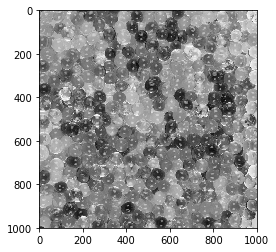

In [11]:
grey_scale = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
plt.imshow(grey_scale, cmap = 'gray')
plt.savefig('grey_scale.jpg')

# Optional Assignment


In [12]:
matrix = [[0 for i in range(1000)] for j in range(1000)]
pix_value = np.arange(0, 250, 0.5)

In [13]:
#matrix = np.zeros((1000, 1000))
#pix_value = np.arange(0, 250, 0.5)

In [14]:
for i in range(len(pix_value)):
    matrix[i][i] = pix_value[i]
    matrix[999-i][999-i] = pix_value[i]
    matrix[i][999-i] = pix_value[i]
    matrix[999-i][i] = pix_value[i]

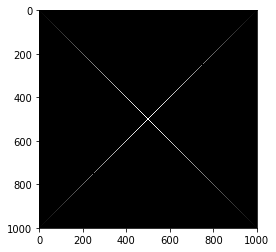

In [15]:
plt.imshow(matrix, cmap = 'gray')

In [16]:
for i in range(len(pix_value)):
    for j in range(i, 2 * len(pix_value) -i ):
        matrix[i][j] = pix_value[i]

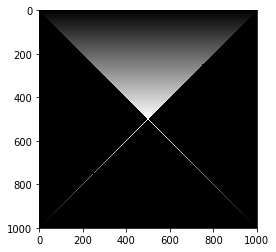

In [17]:
plt.imshow(matrix, cmap = 'gray')

In [18]:
for i in range(len(pix_value)):
    for j in range(i, 2 * len(pix_value) - i):
        matrix[999 - i][j] = pix_value[i]

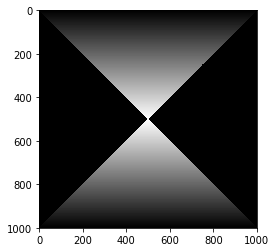

In [19]:
plt.imshow(matrix, cmap = 'gray')

In [20]:
for i in range(len(pix_value)):
    for j in range(i, 2 * len(pix_value) - i):
        matrix[j][i] = pix_value[i]

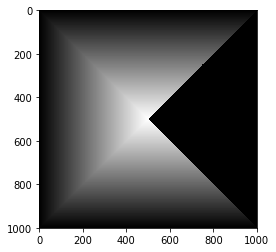

In [21]:
plt.imshow(matrix, cmap = 'gray')

In [22]:
for i in range(len(pix_value)):
    for j in range(i, 2 * len(pix_value) - i):
        matrix[j][999-i] = pix_value[i]

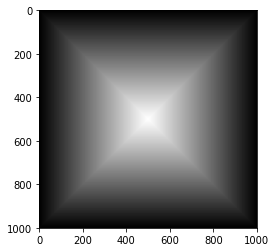

In [23]:
plt.imshow(matrix, cmap = 'gray')

In [24]:
npmat = np.zeros((500, 500))

In [25]:
for i in range(1, len(pix_value)):
    for j in range(i):
        npmat[i][j] = npmat[i-1][j]
    for j in range(i, len(pix_value)):
        npmat[i][j] = pix_value[i]

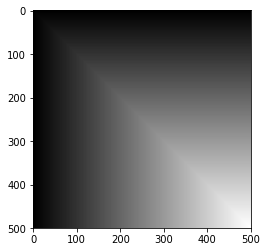

In [26]:
plt.imshow(npmat, cmap = 'gray')

In [27]:
npmat_mirror = npmat[:, ::-1]

In [28]:
top = np.concatenate((npmat, npmat_mirror), axis = 1)

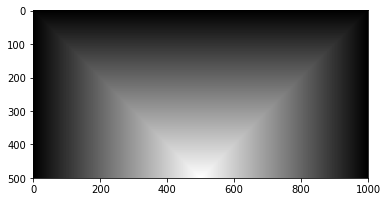

In [29]:
plt.imshow(top, cmap = 'gray')

In [30]:
bottom = top[::-1]


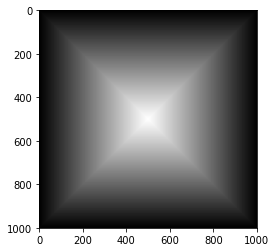

In [31]:
full = np.concatenate((top, bottom))
plt.imshow(full, cmap = 'gray')